In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import randint, uniform

pd.options.display.float_format = '{:.2f}'.format

## IMPORT & EXPLORE

#### FUNCTIONS

In [2]:
def cleaner(df, 
            unneeded_columns=None, 
            date_columns=None, 
            date_format = None , 
            to_category_columns=None, 
            to_cat_code_columns = None , 
            outlier_columns=None):

    """ 
    This function get pandas DataFrame and attributes like 'date_columns' and 'to_category_columns' to manipulate ,
    clean and prepare dataset for usage.
    
    """
    
    # Convert specified columns to datetime
    if date_columns:
        for date_column in date_columns:
            if date_column in df.columns:
                df[date_column] = pd.to_datetime(df[date_column], format = date_format ,errors='coerce')

    # Convert specified columns to category
    if to_category_columns:
        for category_column in to_category_columns:
            if category_column in df.columns:
                df[category_column] = df[category_column].astype('category')
                
        if to_cat_code_columns:
            for column in to_cat_code_columns:
                df[f'{column}_code'] = df[column].cat.codes

    # Handle outliers using the IQR method
    if outlier_columns:
        for outlier_column in outlier_columns:
            if outlier_column in df.columns:
                iqr = df[outlier_column].quantile(0.75) - df[outlier_column].quantile(0.25)
                lower_bound = df[outlier_column].quantile(0.25) - (1.5 * iqr)
                upper_bound = df[outlier_column].quantile(0.75) + (1.5 * iqr)
                df = df[(df[outlier_column] >= lower_bound) & (df[outlier_column] <= upper_bound)]

     # Drop unnecessary columns
    if unneeded_columns:
        df = df.drop(columns=unneeded_columns)  # Use 'errors="ignore"' to avoid errors if columns don't exist.

    # Rename columns
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.replace('(', '', regex=False)
    df.columns = df.columns.str.replace(')', '', regex=False)
    df.columns = df.columns.str.replace('-', '_', regex=False)
    df.columns = df.columns.str.replace('.', '', regex=False)
    df.columns = df.columns.str.replace('/', '', regex=False)
    df.columns = df.columns.str.replace('\\', '', regex=False)
    df.columns = df.columns.str.replace('%', '_percent', regex=False)
    
    return df

#### DATA

In [3]:
krisha_almaty_dataset = pd.read_csv(r"C:\Users\User\Desktop\DATA SCIENCE\Github\krisha_bot\data\original_source\krisha_almaty_dataset.csv")

In [4]:
krisha_almaty_dataset.sample(5)

,price,floor,area_sqm,rooms,title,city,id,balcony,bathroom,contact_name,...,has_phone,images_count,images_downloaded,parameters_raw,parking,price_raw,security,total_floors,url,image_paths
3426,230000,6.00,40.50,1,1-комнатная квартира · 40.5 м² · 6/9 этаж · по...,almaty,694845092,NaN,совмещен,Хозяин недвижимости,...,False,7,7,"{'Бывшее общежитие': 'нет', 'Удобства': 'интер...",NaN,230 000 〒\r\n/ месяц,NaN,9.00,https://krisha.kz/a/show/694845092,listing_694845092/image_01.jpg;listing_6948450...
1054,200000,4.00,34.00,1,1-комнатная квартира · 34 м² · 4/5 этаж · поме...,almaty,760188964,NaN,NaN,Хозяин недвижимости,...,False,9,9,{},NaN,200 000 〒\r\n/ месяц,NaN,5.00,https://krisha.kz/a/show/760188964,listing_760188964/image_01.jpg;listing_7601889...
1788,550000,NaN,120.00,3,3-комнатная квартира · 120 м² · 2 этаж · помес...,almaty,1000453699,1,разделен,Хозяин недвижимости,...,False,9,9,"{'Бывшее общежитие': 'нет', 'Мебель': 'кровать...",NaN,550 000 〒\r\n/ месяц,NaN,NaN,https://krisha.kz/a/show/1000453699,listing_1000453699/image_01.jpg;listing_100045...
4475,250000,7.00,64.00,2,2-комнатная квартира · 64 м² · 7/9 этаж · поме...,almaty,1000210393,1,разделен,Хозяин недвижимости,...,False,10,10,"{'Мебель': 'кровать, шкаф для одежды, кухонный...",NaN,250 000 〒\r\n/ месяц,NaN,9.00,https://krisha.kz/a/show/1000210393,listing_1000210393/image_01.jpg;listing_100021...
6187,270000,3.00,42.00,2,2-комнатная квартира · 42 м² · 3/4 этаж · поме...,almaty,699059857,1,совмещен,Хозяин недвижимости,...,False,20,20,"{'Мебель': 'кровать, обеденный стол, шкаф для ...",NaN,270 000 〒\r\n/ месяц,NaN,4.00,https://krisha.kz/a/show/699059857,listing_699059857/image_01.jpg;listing_6990598...


In [8]:
krisha_almaty_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              6575 non-null   int64  
 1   floor              6195 non-null   float64
 2   area_sqm           6575 non-null   float64
 3   rooms              6575 non-null   int64  
 4   title              6575 non-null   object 
 5   city               6575 non-null   object 
 6   id                 6575 non-null   int64  
 7   balcony            3939 non-null   object 
 8   bathroom           5162 non-null   object 
 9   contact_name       6574 non-null   object 
 10  description        6523 non-null   object 
 11  full_address       6575 non-null   object 
 12  furniture          4527 non-null   object 
 13  has_phone          6575 non-null   bool   
 14  images_count       6575 non-null   int64  
 15  images_downloaded  6575 non-null   int64  
 16  parameters_raw     6575 

In [9]:
krisha_almaty_dataset.columns

Index(['price', 'floor', 'area_sqm', 'rooms', 'title', 'city', 'id', 'balcony',
       'bathroom', 'contact_name', 'description', 'full_address', 'furniture',
       'has_phone', 'images_count', 'images_downloaded', 'parameters_raw',
       'parking', 'price_raw', 'security', 'total_floors', 'url',
       'image_paths'],
      dtype='object')

In [5]:
krisha_almaty_dataset_filtered_columns = krisha_almaty_dataset[['id','floor','total_floors',
                                                                'area_sqm', 'rooms','bathroom',
                                                                'full_address','furniture','parking',
                                                                'security','price','url']]

In [6]:
krisha_almaty_dataset_filtered_columns.sample(5)

,id,floor,total_floors,area_sqm,rooms,bathroom,full_address,furniture,parking,security,price,url
5813,698526047,1.00,1.00,90.00,3,совмещен,"Алматы, Ауэзовский р-н\r\nпоказать на карте",NaN,NaN,NaN,500000,https://krisha.kz/a/show/698526047
5934,1000637925,2.00,5.00,45.00,1,совмещен,"Алматы, Алмалинский р-н\r\nпоказать на карте","кровать, обеденный стол, шкаф для одежды, кухо...",NaN,NaN,200000,https://krisha.kz/a/show/1000637925
1524,1000503869,2.00,5.00,45.00,2,NaN,"Алматы, Алмалинский р-н\r\nпоказать на карте",NaN,NaN,NaN,280000,https://krisha.kz/a/show/1000503869
1067,1000732514,5.00,5.00,100.00,4,разделен,Алматы\r\nпоказать на карте,NaN,NaN,NaN,600000,https://krisha.kz/a/show/1000732514
2242,761960516,4.00,17.00,58.00,2,совмещен,"Алматы, Бостандыкский р-н\r\nпоказать на карте","кровать, обеденный стол, шкаф для одежды, кухо...",NaN,NaN,420000,https://krisha.kz/a/show/761960516


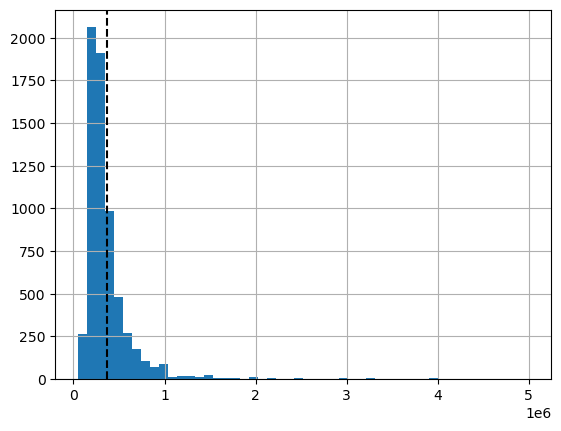

In [18]:
krisha_almaty_dataset_filtered_columns['price'].hist(bins = 50)

plt.axvline(x = krisha_almaty_dataset_filtered_columns['price'].mean(),
            color = 'black',
            linestyle = '--')


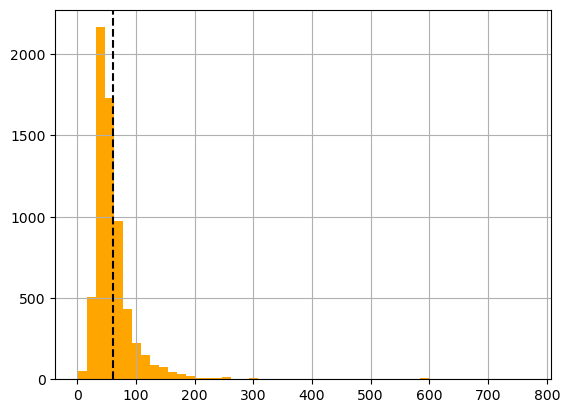

In [19]:
krisha_almaty_dataset_filtered_columns['area_sqm'].hist(bins = 50,color = 'orange')

plt.axvline(x = krisha_almaty_dataset_filtered_columns['area_sqm'].mean(),
            color = 'black',
            linestyle = '--')

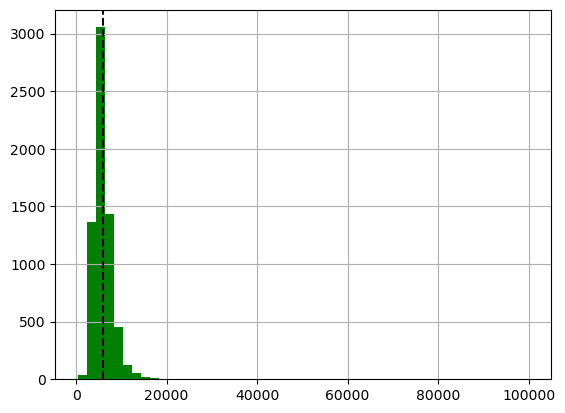

In [20]:
price_per_sqm = krisha_almaty_dataset_filtered_columns['price'] / krisha_almaty_dataset_filtered_columns['area_sqm']

price_per_sqm.hist(bins = 50, color = 'green')

plt.axvline(x = price_per_sqm.mean(),
            color = 'black',
            linestyle = '--')


## CLEAN & PREPARE

#### DEALING WITH NaNs

In [7]:
for column in krisha_almaty_dataset_filtered_columns.columns:

    if krisha_almaty_dataset_filtered_columns[column].isna().sum() != 0:

        print(f'\n column {column} has {np.round(krisha_almaty_dataset_filtered_columns[column].isna().sum() / krisha_almaty_dataset_filtered_columns.shape[0],2) * 100} % of missing values')


 column floor has 6.0 % of missing values

 column total_floors has 6.0 % of missing values

 column bathroom has 21.0 % of missing values

 column furniture has 31.0 % of missing values

 column parking has 98.0 % of missing values

 column security has 84.0 % of missing values


In [9]:
 #column floor has 6.0 % of missing values

 #column total_floors has 6.0 % of missing values 

 # all of them has small amount of nans, but still ,
 # in order to keep as much data as possible for training, let's deal with them using KNN later

In [11]:
for column in ["bathroom","furniture","parking",
               "security"]:

    krisha_almaty_dataset_filtered_columns[column] = krisha_almaty_dataset_filtered_columns[column].fillna('неизвестно')

C:\Users\User\AppData\Local\Temp\ipykernel_17764\2112716305.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  krisha_almaty_dataset_filtered_columns[column] = krisha_almaty_dataset_filtered_columns[column].fillna('неизвестно')


In [14]:
krisha_almaty_dataset_filtered_columns.isna().sum()

id                0
floor           380
total_floors    380
area_sqm          0
rooms             0
bathroom          0
full_address      0
furniture         0
parking           0
security          0
price             0
url               0
dtype: int64

##### KNNImputer

In [15]:
from sklearn.impute import KNNImputer
from sklearn import metrics

In [16]:


# Step 1: Copy your data
df = krisha_almaty_dataset_filtered_columns.copy()

# Step 2: Pick a numeric column to test
col_to_test = 'floor'

# Step 3: Temporarily hide some known values
np.random.seed(0)
known_values_idx = df[df[col_to_test].notna()].index
test_indices = np.random.choice(known_values_idx, size=int(0.2 * len(known_values_idx)), replace=False)

true_values = df.loc[test_indices, col_to_test]
df.loc[test_indices, col_to_test] = np.nan

# Step 4: Try different k values
errors = {}
for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)
    
    # Compare imputed vs true
    imputed_values = df_imputed.loc[test_indices, col_to_test]
    error = metrics.mean_squared_error(true_values, imputed_values, squared=False)  # RMSE
    errors[k] = error

# Step 5: Find best k
best_k = min(errors, key=errors.get)
print(f"Best n_neighbors: {best_k}")

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the func

Best n_neighbors: 17


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
imputer = KNNImputer(n_neighbors=17)

# Select columns without NaNs and not object dtype (non-categorical)
krisha_almaty_dataset_filtered_columns_non_nan = [
    column for column in krisha_almaty_dataset_filtered_columns.columns
    if krisha_almaty_dataset_filtered_columns[column].isna().sum() == 0 and
    krisha_almaty_dataset_filtered_columns[column].dtype != 'O'
]

krisha_almaty_dataset_filtered_columns_nan = krisha_almaty_dataset_filtered_columns.select_dtypes(include = ('number')).drop(columns = krisha_almaty_dataset_filtered_columns_non_nan)

In [18]:
krisha_almaty_dataset_filtered_columns[krisha_almaty_dataset_filtered_columns_nan.columns] = imputer.fit_transform(krisha_almaty_dataset_filtered_columns_nan)

C:\Users\User\AppData\Local\Temp\ipykernel_17764\4095902593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  krisha_almaty_dataset_filtered_columns[krisha_almaty_dataset_filtered_columns_nan.columns] = imputer.fit_transform(krisha_almaty_dataset_filtered_columns_nan)


In [19]:
for column in krisha_almaty_dataset_filtered_columns_nan.columns:
    krisha_almaty_dataset_filtered_columns[column] = np.round(krisha_almaty_dataset_filtered_columns[column])

C:\Users\User\AppData\Local\Temp\ipykernel_17764\290731135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  krisha_almaty_dataset_filtered_columns[column] = np.round(krisha_almaty_dataset_filtered_columns[column])


In [20]:
krisha_almaty_dataset_filtered_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6575 non-null   int64  
 1   floor         6575 non-null   float64
 2   total_floors  6575 non-null   float64
 3   area_sqm      6575 non-null   float64
 4   rooms         6575 non-null   int64  
 5   bathroom      6575 non-null   object 
 6   full_address  6575 non-null   object 
 7   furniture     6575 non-null   object 
 8   parking       6575 non-null   object 
 9   security      6575 non-null   object 
 10  price         6575 non-null   int64  
 11  url           6575 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 616.5+ KB


In [21]:
krisha_almaty_dataset_filtered_columns.isna().sum().any()

False

In [24]:
# Finally!

krisha_almaty_dataset_filtered_columns.sample(5)


,id,floor,total_floors,area_sqm,rooms,bathroom,full_address,furniture,parking,security,price,url
3353,760758561,1.00,3.00,153.50,3,неизвестно,"Алматы, Бостандыкский р-н\r\nпоказать на карте",неизвестно,неизвестно,неизвестно,3300000,https://krisha.kz/a/show/760758561
363,1000272953,9.00,12.00,55.00,2,совмещен,"Алматы, Алмалинский р-н\r\nпоказать на карте","кровать, обеденный стол, шкаф для одежды, кухо...",неизвестно,неизвестно,400000,https://krisha.kz/a/show/1000272953
4826,682205892,7.00,14.00,125.00,3,разделен,"Алматы, Бостандыкский р-н\r\nпоказать на карте","кровать, обеденный стол, шкаф для одежды, кухо...",неизвестно,неизвестно,400000,https://krisha.kz/a/show/682205892
5404,696773012,5.00,9.00,60.00,2,разделен,"Алматы, Бостандыкский р-н\r\nпоказать на карте",неизвестно,неизвестно,неизвестно,280000,https://krisha.kz/a/show/696773012
783,680032342,4.00,5.00,62.00,3,разделен,"Алматы, Алмалинский р-н\r\nпоказать на карте","кровать, обеденный стол, шкаф для одежды, кухо...",неизвестно,неизвестно,300000,https://krisha.kz/a/show/680032342


#### DEALING WITH TEXTUAL DATA

In [25]:
krisha_almaty_dataset_filtered_columns.columns

Index(['id', 'floor', 'total_floors', 'area_sqm', 'rooms', 'bathroom',
       'full_address', 'furniture', 'parking', 'security', 'price', 'url'],
      dtype='object')

In [32]:
krisha_almaty_dataset_filtered_columns = cleaner(df = krisha_almaty_dataset_filtered_columns, 
                                                 unneeded_columns=None, 
                                                 date_columns=None, 
                                                 date_format = None , 
                                                 to_category_columns=["full_address",'furniture', 'parking', 'security','bathroom'], 
                                                 to_cat_code_columns = ["full_address",'furniture', 'parking', 'security','bathroom'], 
                                                 outlier_columns=['price'])

C:\Users\User\AppData\Local\Temp\ipykernel_17764\1044547089.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category_column] = df[category_column].astype('category')
C:\Users\User\AppData\Local\Temp\ipykernel_17764\1044547089.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category_column] = df[category_column].astype('category')
C:\Users\User\AppData\Local\Temp\ipykernel_17764\1044547089.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [33]:
krisha_almaty_dataset_filtered_columns.describe()

,id,floor,total_floors,area_sqm,rooms,price,full_address_code,furniture_code,parking_code,security_code,bathroom_code
count,6135.00,6135.00,6135.00,6135.00,6135.00,6135.00,6135.00,6135.00,6135.00,6135.00,6135.00
mean,826593058.25,5.01,8.95,54.75,1.82,299602.93,3.87,27.63,1.03,33.11,3.52
std,152206407.78,3.56,4.99,24.24,0.74,128837.96,2.08,10.49,0.23,10.71,1.75
min,5674257.00,1.00,1.00,1.00,1.00,47000.00,0.00,0.00,0.00,0.00,0.00
25%,695389439.50,2.00,5.00,40.00,1.00,200000.00,2.00,19.00,1.00,32.00,2.00
50%,761682413.00,4.00,9.00,50.00,2.00,270000.00,4.00,20.00,1.00,32.00,5.00
75%,1000549930.50,7.00,12.00,65.00,2.00,350000.00,5.00,34.00,1.00,32.00,5.00
max,1000738885.00,30.00,33.00,769.00,5.00,700000.00,8.00,58.00,3.00,114.00,6.00


In [34]:
krisha_almaty_dataset_filtered_columns.sample(5)

,id,floor,total_floors,area_sqm,rooms,bathroom,full_address,furniture,parking,security,price,url,full_address_code,furniture_code,parking_code,security_code,bathroom_code
3477,1000679535,4,5,38.00,1,неизвестно,"Алматы, Ауэзовский р-н\r\nпоказать на карте","кровать, обеденный стол, шкаф для одежды, кухо...",неизвестно,неизвестно,185000,https://krisha.kz/a/show/1000679535,3,18,1,32,1
3275,1000127575,5,9,79.00,2,неизвестно,"Алматы, Бостандыкский р-н\r\nпоказать на карте","кровать, обеденный стол, шкаф для одежды, кухо...",неизвестно,неизвестно,550000,https://krisha.kz/a/show/1000127575,4,18,1,32,1
4016,692031598,2,2,25.00,1,разделен,"Алматы, Алатауский р-н\r\nпоказать на карте",неизвестно,неизвестно,неизвестно,110000,https://krisha.kz/a/show/692031598,1,34,1,32,2
3199,762283134,1,5,49.00,2,разделен,"Алматы, Алмалинский р-н\r\nпоказать на карте","кровать, обеденный стол, кухонный гарнитур, диван",неизвестно,неизвестно,400000,https://krisha.kz/a/show/762283134,2,10,1,32,2
5223,1000430540,5,9,90.00,3,разделен,"Алматы, Алатауский р-н\r\nпоказать на карте","кровать, обеденный стол, шкаф для одежды, кухо...",неизвестно,неизвестно,300000,https://krisha.kz/a/show/1000430540,1,20,1,32,2


In [35]:
krisha_almaty_dataset_filtered_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6135 entries, 0 to 6574
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 6135 non-null   int64   
 1   floor              6135 non-null   int32   
 2   total_floors       6135 non-null   int32   
 3   area_sqm           6135 non-null   float64 
 4   rooms              6135 non-null   int64   
 5   bathroom           6135 non-null   category
 6   full_address       6135 non-null   category
 7   furniture          6135 non-null   category
 8   parking            6135 non-null   category
 9   security           6135 non-null   category
 10  price              6135 non-null   int64   
 11  url                6135 non-null   object  
 12  full_address_code  6135 non-null   int8    
 13  furniture_code     6135 non-null   int8    
 14  parking_code       6135 non-null   int8    
 15  security_code      6135 non-null   int8    
 16  bathroom_co

## SAVE

In [37]:
krisha_almaty_rental = krisha_almaty_dataset_filtered_columns

In [38]:
krisha_almaty_rental.to_csv('krisha_almaty_rental.csv.gz',compression = 'gzip',index = False)